In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score,r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# - Data Cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
import warnings
warnings.filterwarnings("ignore")

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [22]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

# One hot encoding

In [24]:
#drop loanid
df.drop(columns=["Loan_ID"], inplace=True)

#(Gender, Married, Education, Self_Employed, Property_Area, Loan_Status) → need encoding
df = pd.get_dummies(df, columns=["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"], drop_first=True)

#ApplicantIncome + CoapplicantIncome can be combined into a TotalIncome feature.
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [25]:
df.drop(columns=["ApplicantIncome", "CoapplicantIncome"], inplace=True)

In [26]:
df['Dependents']=df['Dependents'].replace('3+', 3).astype(int)

# Split the dataset into training and test sets (70/30).


In [27]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["Loan_Status_Y"]), df["Loan_Status_Y"], test_size=0.3, random_state=42)


# Feature scaling

In [31]:
# Feature Scaling splitted data
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'total_income']
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])


In [34]:
x_test

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,total_income
350,0,0.966089,0.304375,1.0,True,True,False,False,True,False,0.324332
377,0,-0.191434,0.304375,1.0,True,True,False,False,True,False,-0.438736
163,2,0.139287,0.304375,1.0,True,True,False,False,False,False,-0.230263
609,0,-0.888310,0.304375,1.0,False,False,False,False,False,False,-0.664156
132,0,-0.900121,0.304375,1.0,True,False,False,False,True,False,-0.693252
...,...,...,...,...,...,...,...,...,...,...,...
380,0,-0.215057,0.304375,1.0,True,True,False,False,True,False,-0.195252
446,2,-0.427663,0.304375,1.0,True,True,True,False,False,False,-0.384060
144,2,0.481820,-2.335320,1.0,True,True,False,False,False,True,0.751829
290,0,-0.085131,0.304375,1.0,True,True,False,False,False,False,-0.249928


# Logistic Regression (without GridSearchCV)

In [35]:
warnings.filterwarnings("ignore")

# Train Logistic Regression with different penalties: L1, L2, and ElasticNet.
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logistic_model_l1.fit(x_train, y_train)
y_pred_l1 = logistic_model_l1.predict(x_test)

logistic_model_l2 = LogisticRegression(penalty='l2')
logistic_model_l2.fit(x_train, y_train)
y_pred_l2 = logistic_model_l2.predict(x_test)

logistic_model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
logistic_model_en.fit(x_train, y_train)
y_pred_en = logistic_model_en.predict(x_test)


# Decision Tree (without GridSearchCV)

In [36]:
#Train Decision Tree with basic parameters (max_depth, min_samples_split).
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(x_test)


# Random forest (Without GridSearchCV)

In [39]:
#Random Forest (without GridSearchCV)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [40]:
print("L1 Penalty Results:")
print("L1 Penalty Accuracy:", accuracy_score(y_test, y_pred_l1))
print("L1 Penalty Precision:", precision_score(y_test, y_pred_l1))
print("L1 Penalty Recall:", recall_score(y_test, y_pred_l1))
print("L1 Penalty F1 Score:", f1_score(y_test, y_pred_l1))
print("\nL2 Penalty Results:")
print("L2 Penalty Accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 Penalty Precision:", precision_score(y_test, y_pred_l2))
print("L2 Penalty Recall:", recall_score(y_test, y_pred_l2))
print("L2 Penalty F1 Score:", f1_score(y_test, y_pred_l2))
print("\nElasticNet Penalty Results:")
print("ElasticNet Penalty Accuracy:", accuracy_score(y_test, y_pred_en))
print("ElasticNet Penalty Precision:", precision_score(y_test, y_pred_en))
print("ElasticNet Penalty Recall:", recall_score(y_test, y_pred_en))
print("ElasticNet Penalty F1 Score:", f1_score(y_test, y_pred_en))
print("\nDecision Tree Results:")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Precision:", precision_score(y_test, y_pred_tree))
print("Decision Tree Recall:", recall_score(y_test, y_pred_tree))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree))
print("\nRandom Forest Results:")
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall:", recall_score(y_test, y_pred))
print("Random Forest F1 Score:", f1_score(y_test, y_pred))

L1 Penalty Results:
L1 Penalty Accuracy: 0.7837837837837838
L1 Penalty Precision: 0.7564102564102564
L1 Penalty Recall: 0.9833333333333333
L1 Penalty F1 Score: 0.855072463768116

L2 Penalty Results:
L2 Penalty Accuracy: 0.7837837837837838
L2 Penalty Precision: 0.7564102564102564
L2 Penalty Recall: 0.9833333333333333
L2 Penalty F1 Score: 0.855072463768116

ElasticNet Penalty Results:
ElasticNet Penalty Accuracy: 0.7837837837837838
ElasticNet Penalty Precision: 0.7564102564102564
ElasticNet Penalty Recall: 0.9833333333333333
ElasticNet Penalty F1 Score: 0.855072463768116

Decision Tree Results:
Decision Tree Accuracy: 0.7891891891891892
Decision Tree Precision: 0.7755102040816326
Decision Tree Recall: 0.95
Decision Tree F1 Score: 0.8539325842696629

Random Forest Results:
Random Forest Accuracy: 0.7945945945945946
Random Forest Precision: 0.777027027027027
Random Forest Recall: 0.9583333333333334
Random Forest F1 Score: 0.8582089552238806


# Model Training (with GridSearchCV)


In [41]:
#Perform hyperparameter tuning for Logistic Regression (C, penalty, solver, l1_ratio).
warnings.filterwarnings("ignore")
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Logistic Regression with the best hyperparameters.
log_reg_best = LogisticRegression(**best_params)
log_reg_best.fit(x_train, y_train)

y_pred_best = log_reg_best.predict(x_test)

print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1 Score:", f1_score(y_test, y_pred_best))

Best Hyperparameters: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression Accuracy: 0.7837837837837838
Best Logistic Regression Precision: 0.7564102564102564
Best Logistic Regression Recall: 0.9833333333333333
Best Logistic Regression F1 Score: 0.855072463768116


In [47]:
#Perform hyperparameter tuning for Decision Tree (max_depth, min_samples_split, min_samples_leaf, criterion).
param_grid_tree = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_search_tree.fit(x_train, y_train)
best_params_tree = grid_search_tree.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_tree)

# Train Decision Tree with the best hyperparameters.
tree_best = DecisionTreeClassifier(**best_params_tree)

tree_best.fit(x_train, y_train)

y_pred_tree_best = tree_best.predict(x_test)

print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree_best))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_tree_best))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_tree_best))
print("Best Decision Tree F1 Score:", f1_score(y_test, y_pred_tree_best))


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.7837837837837838
Best Decision Tree Precision: 0.7564102564102564
Best Decision Tree Recall: 0.9833333333333333
Best Decision Tree F1 Score: 0.855072463768116


In [44]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
grid_search.fit(x_train, y_train)

# --- Best model ---
best_rf = grid_search.best_estimator_

# --- Predictions ---
y_pred_rf = best_rf.predict(x_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [45]:
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Best Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

Best Random Forest Accuracy: 0.7891891891891892
Best Random Forest Precision: 0.7612903225806451
Best Random Forest Recall: 0.9833333333333333
Best Random Forest F1 Score: 0.8581818181818182


# Comparison & Analysis

In [48]:
#Comparison & Analysis
print("\nComparison of Models (Accuracy):")
print("Logistic Regression (L1) Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Logistic Regression (L2) Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Logistic Regression (ElasticNet) Accuracy:", accuracy_score(y_test, y_pred_en))
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree  best Accuracy:", accuracy_score(y_test, y_pred_tree_best))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nComparison of Models (F1 Score):")
print("Logistic Regression (L1) F1 Score:", f1_score(y_test, y_pred_l1))
print("Logistic Regression (L2) F1 Score:", f1_score(y_test, y_pred_l2))
print("Logistic Regression (ElasticNet) F1 Score:", f1_score(y_test, y_pred_en))
print("Best Logistic Regression F1 Score:", f1_score(y_test, y_pred_best))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree))
print("Decision Tree  best F1 Score:", f1_score(y_test, y_pred_tree_best))
print("Random Forest F1 Score:", f1_score(y_test, y_pred))
print("Best Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

print("\nComparison of Models (Precision):")
print("Logistic Regression (L1) Precision:", precision_score(y_test, y_pred_l1))
print("Logistic Regression (L2) Precision:", precision_score(y_test, y_pred_l2))
print("Logistic Regression (ElasticNet) Precision:", precision_score(y_test, y_pred_en))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Decision Tree Precision:", precision_score(y_test, y_pred_tree))
print("Decision Tree  best Precision:", precision_score(y_test, y_pred_tree_best))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_rf))

print("\nComparison of Models (Recall):")
print("Logistic Regression (L1) Recall:", recall_score(y_test, y_pred_l1))
print("Logistic Regression (L2) Recall:", recall_score(y_test, y_pred_l2))
print("Logistic Regression (ElasticNet) Recall:", recall_score(y_test, y_pred_en))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Decision Tree Recall:", recall_score(y_test, y_pred_tree))
print("Decision Tree  best Recall:", recall_score(y_test, y_pred_tree_best))
print("Random Forest Recall:", recall_score(y_test, y_pred))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_rf))




Comparison of Models (Accuracy):
Logistic Regression (L1) Accuracy: 0.7837837837837838
Logistic Regression (L2) Accuracy: 0.7837837837837838
Logistic Regression (ElasticNet) Accuracy: 0.7837837837837838
Best Logistic Regression Accuracy: 0.7837837837837838
Decision Tree Accuracy: 0.7891891891891892
Decision Tree  best Accuracy: 0.7837837837837838
Random Forest Accuracy: 0.7945945945945946
Best Random Forest Accuracy: 0.7891891891891892

Comparison of Models (F1 Score):
Logistic Regression (L1) F1 Score: 0.855072463768116
Logistic Regression (L2) F1 Score: 0.855072463768116
Logistic Regression (ElasticNet) F1 Score: 0.855072463768116
Best Logistic Regression F1 Score: 0.855072463768116
Decision Tree F1 Score: 0.8539325842696629
Decision Tree  best F1 Score: 0.855072463768116
Random Forest F1 Score: 0.8582089552238806
Best Random Forest F1 Score: 0.8581818181818182

Comparison of Models (Precision):
Logistic Regression (L1) Precision: 0.7564102564102564
Logistic Regression (L2) Precisio

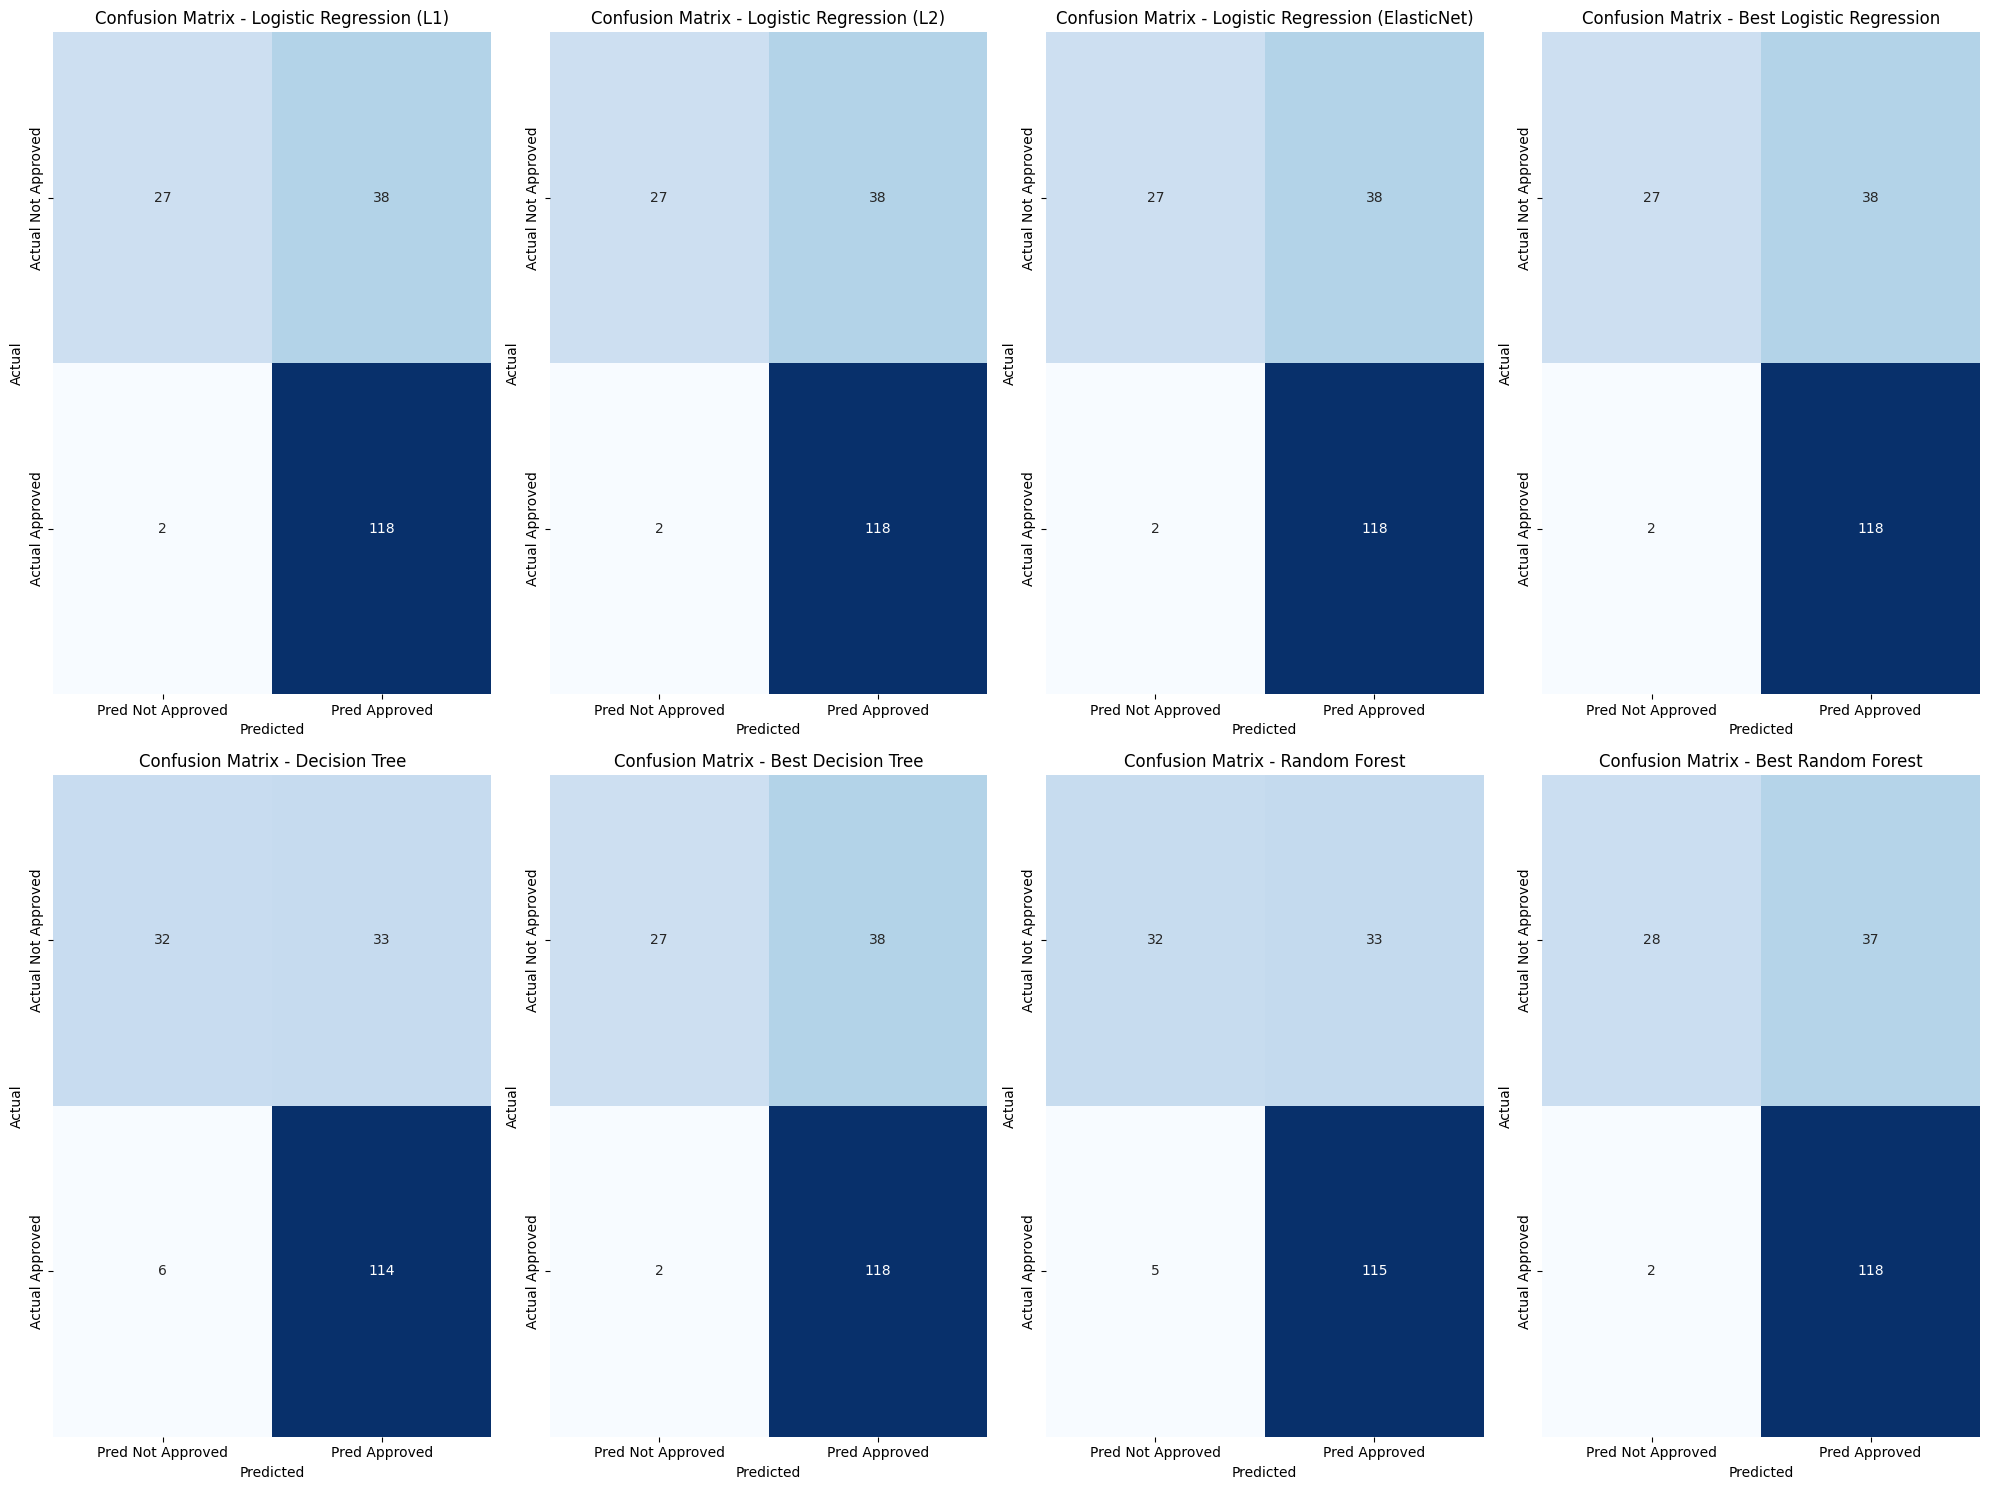

In [49]:
#confusion matrix
confusion_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
confusion_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
confusion_matrix_en = confusion_matrix(y_test, y_pred_en)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1)
sns.heatmap(confusion_matrix_l1, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Logistic Regression (L1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 2)
sns.heatmap(confusion_matrix_l2, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Logistic Regression (L2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 3)
sns.heatmap(confusion_matrix_en, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Logistic Regression (ElasticNet)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 4)
sns.heatmap(confusion_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Best Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 5)
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 6)
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Best Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 7)
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 4, 8)
sns.heatmap(confusion_matrix_rf_best, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Not Approved', 'Pred Approved'], yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


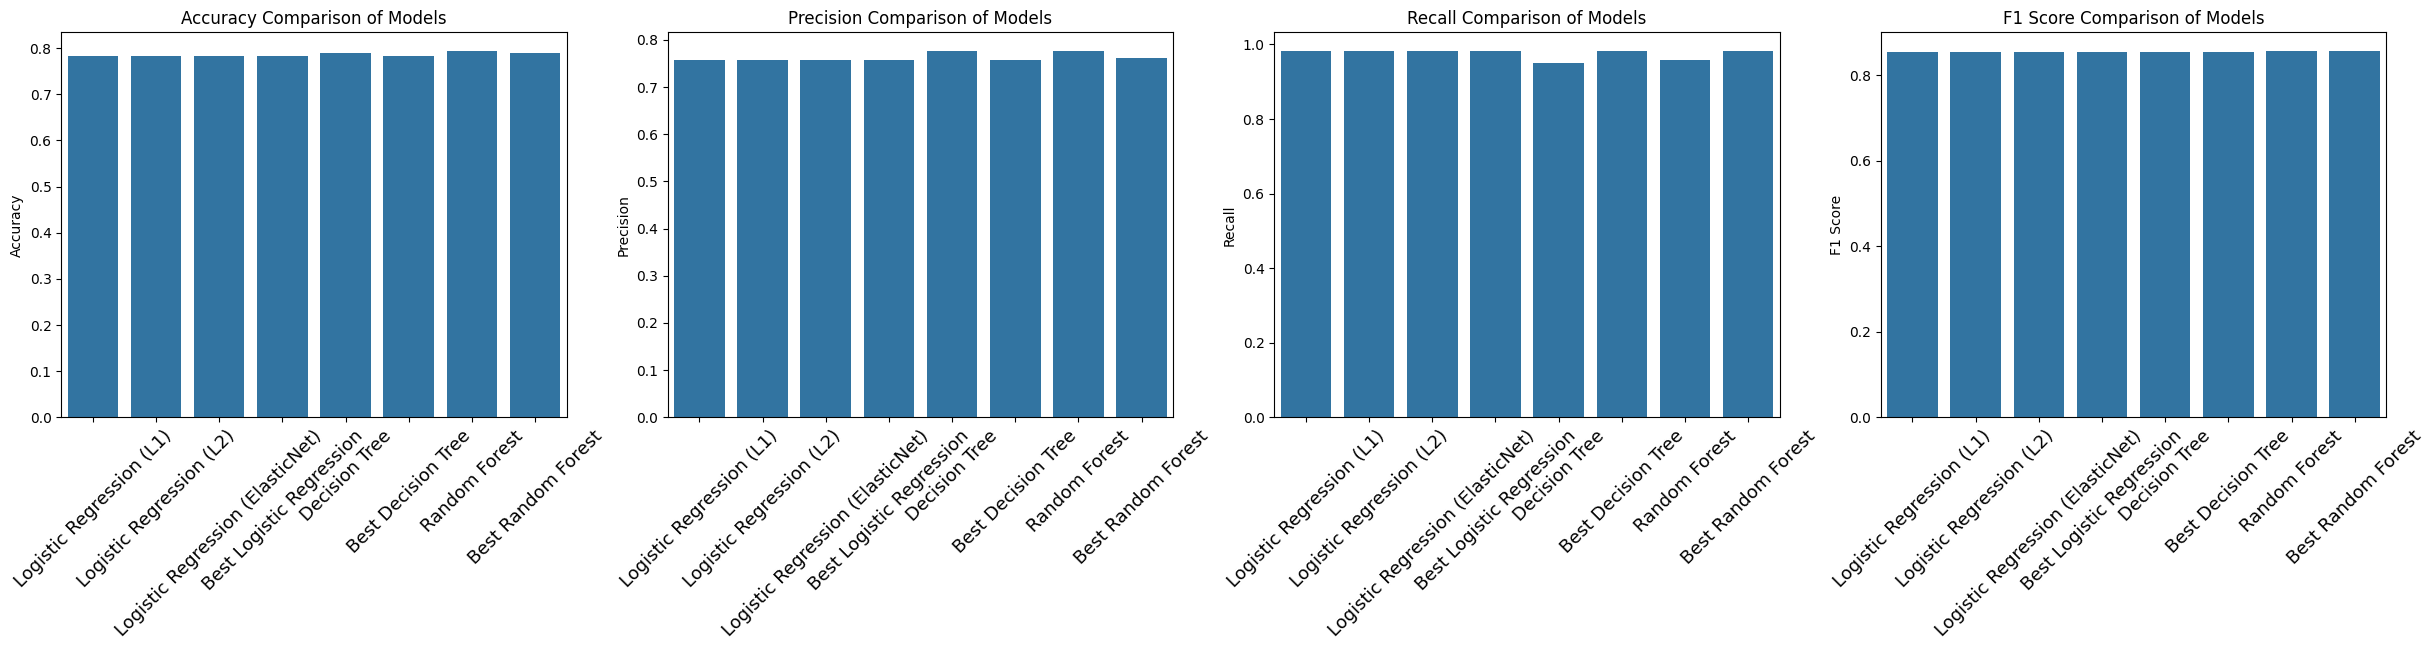

In [57]:
model_names = ['Logistic Regression (L1)', 'Logistic Regression (L2)', 'Logistic Regression (ElasticNet)', 'Best Logistic Regression', 'Decision Tree', 'Best Decision Tree','Random Forest','Best Random Forest']

plt.figure(figsize=(30, 5))
plt.subplot(1, 4, 1)
model_accuracies = [accuracy_score(y_test, y_pred_l1), accuracy_score(y_test, y_pred_l2), accuracy_score(y_test, y_pred_en), accuracy_score(y_test, y_pred_best), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_tree_best), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]
sns.barplot(x=model_names, y=model_accuracies)
plt.title("Accuracy Comparison of Models")
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("Accuracy")

plt.subplot(1, 4, 2)
model_precisions = [precision_score(y_test, y_pred_l1), precision_score(y_test, y_pred_l2), precision_score(y_test, y_pred_en), precision_score(y_test, y_pred_best), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_tree_best), precision_score(y_test, y_pred), precision_score(y_test, y_pred_rf)]
sns.barplot(x=model_names, y=model_precisions)
plt.title("Precision Comparison of Models")
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("Precision")

plt.subplot(1, 4, 3)
model_recalls = [recall_score(y_test, y_pred_l1), recall_score(y_test, y_pred_l2), recall_score(y_test, y_pred_en), recall_score(y_test, y_pred_best), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_tree_best), recall_score(y_test, y_pred), recall_score(y_test, y_pred_rf)]
sns.barplot(x=model_names, y=model_recalls)
plt.title("Recall Comparison of Models")
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("Recall")

plt.subplot(1, 4, 4)
model_f1_scores = [f1_score(y_test, y_pred_l1), f1_score(y_test, y_pred_l2), f1_score(y_test, y_pred_en), f1_score(y_test, y_pred_best), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree_best), f1_score(y_test, y_pred), f1_score(y_test, y_pred_rf)]
sns.barplot(x=model_names, y=model_f1_scores)
plt.title("F1 Score Comparison of Models")
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("F1 Score")


plt.show()